# Make PI case with no polyna  winds

In [2]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
from netCDF4 import MFDataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Extract the variables
file ='/g/data1/v45/pas561/mom/input/wedpolywinds/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uc = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/wedpolywinds/v_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
vc = nc.variables['V_10_MOD'][:]
nc.close() # close the file



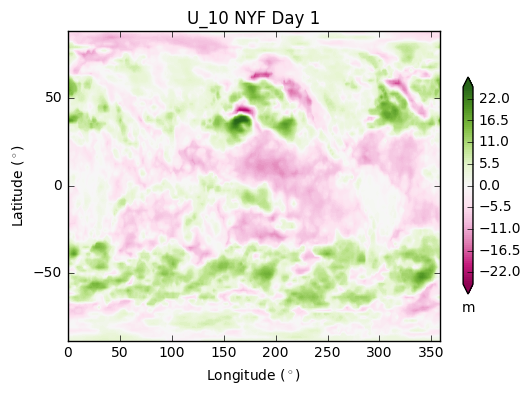

In [5]:
clev = np.arange(-25,25.5,0.5)

plt.contourf(lon,lat,uc[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF Day 1')

plt.show()
#plt.savefig('V.pdf')

## calc std NYF of winds

In [6]:
#uvstd=np.ma.std(np.ma.sqrt(v**2 + u**2),axis=0)
#print uvstd.shape
#print np.max(uvstd)

#remove small region on NE corner of weddell PI winds

In [14]:
# Extract full PI variables
file ='/g/data1/v45/pas561/mom/input/wedpolywinds/u_10.30Sup15shift4.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uf = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/wedpolywinds/v_10.30Sup15shift4.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
vf = nc.variables['V_10_MOD'][:]
nc.close() # close the file

# Extract full PI variables
file ='/g/data1/v45/pas561/mom/input/wedpolywinds/u_10.30Sup15shift4.indo.v4.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
up1 = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/wedpolywinds/v_10.30Sup15shift4.indo.v4.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
vp1 = nc.variables['V_10_MOD'][:]
nc.close() # close the file

# Extract control the variables
file ='/g/data1/v45/pas561/mom/input/wedpolywinds/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uc = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/wedpolywinds/v_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
vc = nc.variables['V_10_MOD'][:]
nc.close() # close the file





In [15]:
ua=uf-up1-uc
va=vf-vp1-vc

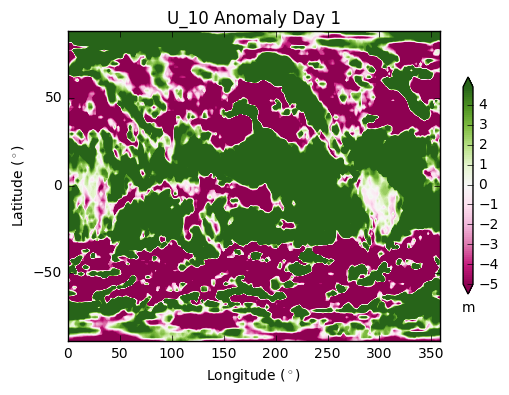

In [17]:
clev = np.arange(-5,5,0.1)

plt.contourf(lon,lat,ua[0]-uc[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 Anomaly Day 1')

plt.show()

In [173]:
#find values within lat lon bounds
tmp1=np.argwhere(lon>290)# and lon<320)
tmp2=np.argwhere(lon>320)# and lon<320)
tmp3=np.argwhere(lat>-55)# and lat<-45)
tmp4=np.argwhere(lat>-25)# and lat<-45)
print uc.shape

(1460, 94, 192)


In [208]:
# the zeros here convert it to an int64 instead of an array
lon_start, lon_end, lat_start, lat_end = tmp1[1][0], tmp2[1][0], tmp3[1][0], tmp4[1][0]
print type(lat_start)

<type 'numpy.int64'>


In [209]:
print tmp1[1], tmp2[1], tmp3[1], tmp4[1]

[156] [172] [19] [35]


In [210]:
um = uc.copy()
um[:,lat_start:lat_end+1, lon_start:lon_end+1] = uf[:,lat_start:lat_end+1, lon_start:lon_end+1]


#um[:,tmp3[1]:tmp4[1],tmp1[1]:tmp2[1]]=10 #uf[:,tmp3[1]:tmp4[1],tmp1[1]:tmp2[1]]*10
print um.shape

(1460, 94, 192)


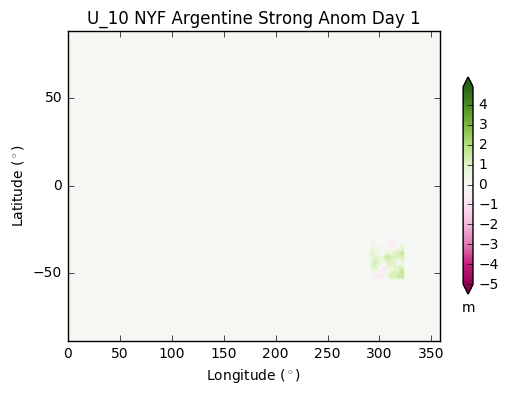

In [212]:
clev = np.arange(-5,5,0.1)

plt.contourf(lon,lat,um[0]-uc[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF Argentine Strong Anom Day 1')

plt.show()
#plt.savefig('V.pdf')

## do the v component

In [214]:
vm = vc.copy()
vm[:,lat_start:lat_end+1, lon_start:lon_end+1] = vf[:,lat_start:lat_end+1, lon_start:lon_end+1]


#um[:,tmp3[1]:tmp4[1],tmp1[1]:tmp2[1]]=10 #uf[:,tmp3[1]:tmp4[1],tmp1[1]:tmp2[1]]*10
print um.shape



(1460, 94, 192)


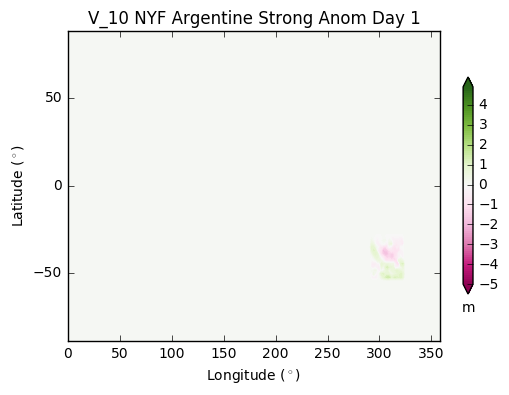

In [217]:
clev = np.arange(-5,5,0.1)

plt.contourf(lon,lat,vm[0]-vc[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('V_10 NYF Argentine Strong Anom Day 1')

plt.show()

## write to file

In [218]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/gfdl_nyf_1080/u_10.30Sup15.Arg.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)


In [219]:
ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/gfdl_nyf_1080/v_10.30Sup15.Arg.nc', 'a')

var = ofile.variables['V_10_MOD']
print var.shape
print vm.shape
var[:] = vm

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)


(2700, 3600)
(2700, 3600)
(2700, 3600)
